<a href="https://colab.research.google.com/github/rinazbelhaj/EVA/blob/master/EIP-2/Assignment%203%20-%20Ageing_Using_CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Description



1. Check the following github repo : [Generative Model](https://github.com/sungnam0/Face-Aging-with-CycleGAN)
2. Move to Keras
3. Minimum submission threshold is to reproduce the similar results
4. Free to use any dataset
5. Free to use any machine
6. Free to add any improvements
7. Result is highly dependent on the quality of reproduction and additional results. 
8. Move the project to private repo on GitHub
9. Submit

## Young to Old
![Young to Old](https://github.com/sungnam0/Face-Aging-with-CycleGAN/blob/master/datasets/face/20s_to_50s.png?raw=true)

## Old to Young
![Old to Young](https://github.com/sungnam0/Face-Aging-with-CycleGAN/blob/master/datasets/face/50s_to_20s.png?raw=true)


# Mounting Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Creating numpy array of images for training

In [0]:
gpath = 'gdrive/My Drive/Data/FaceAgeing/'

In [1]:
!ls

sample_data


In [0]:
!cp gdrive/'My Drive'/Data/UTKFace.zip -d ./
!unzip -qq 'UTKFace.zip'
!ls

gdrive	sample_data  UTKFace  UTKFace.zip


In [0]:
!rm -rf clean_face
!mkdir clean_face
!mkdir clean_face/data20
!mkdir clean_face/data50

In [0]:
import os
from shutil import copyfile

files = os.listdir('UTKFace')
for i in files:
  age = int(i.split('_')[0])
  src = 'UTKFace/' + i
  if age>=20 and age<25:
    dst = 'clean_face/data20/'+i
    copyfile(src, dst)
  elif age>=50 and age<60:
    dst = 'clean_face/data50/'+i
    copyfile(src, dst)

In [0]:
import os
import cv2
from collections import Counter
import operator

old_path = 'UTKFace/'

images = os.listdir(old_path)

min_h = 300
max_h = 0
min_w = 300
max_w = 0

list_h = []
list_w = []

for i in images:
  img = cv2.imread(old_path+i)
  #print(img.shape)
  if(img.shape[0]<min_h):
    min_h=img.shape[0]
  if(img.shape[1]<min_w):
    min_w=img.shape[1]
  if(img.shape[0]>max_h):
    max_h=img.shape[0]
  if(img.shape[1]>max_w):
    max_w=img.shape[1]
  list_h.append(img.shape[0])
  list_w.append(img.shape[1])

dict_h = dict( sorted(Counter(list_h).items(), key=operator.itemgetter(0),reverse=True))
dict_w = dict( sorted(Counter(list_w).items(), key=operator.itemgetter(0),reverse=True))

print("Height - Min : ",min_h,", Max : ",max_h)
print("Width  - Min : ",min_w,", Max : ",max_w)

print("Common Height : ",Counter(dict_h))
print("Common Width : ",Counter(dict_w))

Height - Min :  200 , Max :  200
Width  - Min :  200 , Max :  200
Common Height :  Counter({200: 23708})
Common Width :  Counter({200: 23708})


In [0]:
# example of preparing the young to old dataset
from os import listdir
from numpy import asarray
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
 
# load all images in a directory into memory
def load_images(path, size=(200,200)):
	data_list = list()
	# enumerate filenames in directory, assume all are images
	for filename in listdir(path):
		# load and resize the image
		pixels = load_img(path + filename, target_size=size)
		# convert to numpy array
		pixels = img_to_array(pixels)
		# store
		data_list.append(pixels)
	return asarray(data_list)
 
# dataset path
path = 'clean_face/'
# load dataset A
dataA = load_images(path + 'data20/')
print('Loaded dataA: ', dataA.shape)
# load dataset B
dataB = load_images(path + 'data50/')
print('Loaded dataB: ', dataB.shape)
# save as compressed numpy array
filename = gpath+'clean_face.npz'
savez_compressed(filename, dataA, dataB)
print('Saved dataset: ', filename)

Loaded dataA:  (2310, 200, 200, 3)
Loaded dataB:  (2299, 200, 200, 3)
Saved dataset:  gdrive/My Drive/Data/FaceAgeing/clean_face.npz


# Display Source and Target Image

Loaded:  (2310, 200, 200, 3) (2299, 200, 200, 3)


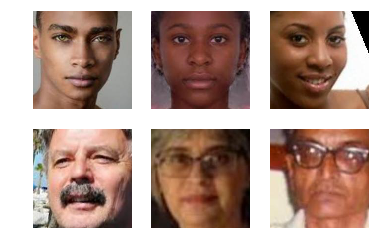

In [0]:
# load and plot the prepared dataset
from numpy import load
from matplotlib import pyplot
# load the dataset
data = load(gpath+'clean_face.npz')
dataA, dataB = data['arr_0'], data['arr_1']
print('Loaded: ', dataA.shape, dataB.shape)
# plot source images
n_samples = 3
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + i)
	pyplot.axis('off')
	pyplot.imshow(dataA[i].astype('uint8'))
# plot target image
for i in range(n_samples):
	pyplot.subplot(2, n_samples, 1 + n_samples + i)
	pyplot.axis('off')
	pyplot.imshow(dataB[i].astype('uint8'))
pyplot.show()

# Installing Keras Contrib

In [4]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-of9w1p7u
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-of9w1p7u
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101066 sha256=b499531926222825b6764a325623ecff8d49809b43d38d4d6f16ea8db051ccbf
  Stored in directory: /tmp/pip-ephem-wheel-cache-2ruf3j98/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


# Defining CycleGAN Model and helper functions

In [5]:
# example of training a cyclegan on the young to old dataset
from random import random
from numpy import load
from numpy import zeros
from numpy import ones
from numpy import asarray
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.models import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization
from matplotlib import pyplot

# define the discriminator model
def define_discriminator(image_shape):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# source image input
	in_image = Input(shape=image_shape)
	# C64
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(in_image)
	d = LeakyReLU(alpha=0.2)(d)
	# C128
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = InstanceNormalization(axis=-1)(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	patch_out = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	# define model
	model = Model(in_image, patch_out)
	# compile model
	model.compile(loss='mse', optimizer=Adam(lr=0.0002, beta_1=0.5), loss_weights=[0.5])
	return model

# generator a resnet block
def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first layer convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# second convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	# concatenate merge channel-wise with input layer
	g = Concatenate()([g, input_layer])
	return g

# define the standalone generator model
def define_generator(image_shape, n_resnet=9):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# c7s1-64
	g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d128
	g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d256
	g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# R256
	for _ in range(n_resnet):
		g = resnet_block(256, g)
	# u128
	g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# u64
	g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# c7s1-3
	g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	return model

# define a composite model for updating generators by adversarial and cycle loss
def define_composite_model(g_model_1, d_model, g_model_2, image_shape):
	# ensure the model we're updating is trainable
	g_model_1.trainable = True
	# mark discriminator as not trainable
	d_model.trainable = False
	# mark other generator model as not trainable
	g_model_2.trainable = False
	# discriminator element
	input_gen = Input(shape=image_shape)
	gen1_out = g_model_1(input_gen)
	output_d = d_model(gen1_out)
	# identity element
	input_id = Input(shape=image_shape)
	output_id = g_model_1(input_id)
	# forward cycle
	output_f = g_model_2(gen1_out)
	# backward cycle
	gen2_out = g_model_2(input_id)
	output_b = g_model_1(gen2_out)
	# define model graph
	model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
	# define optimization algorithm configuration
	opt = Adam(lr=0.0002, beta_1=0.5)
	# compile model with weighting of least squares loss and L1 loss
	model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)
	return model

# load and prepare training images
def load_real_samples(filename):
	# load the dataset
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return X, y

# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, dataset, patch_shape):
	# generate fake instance
	X = g_model.predict(dataset)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y


# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, trainX, name, n_samples=5):
  # select a sample of input images
  X_in, _ = generate_real_samples(trainX, n_samples, 0)
  # generate translated images
  X_out, _ = generate_fake_samples(g_model, X_in, 0)
  # scale all pixels from [-1,1] to [0,1]
  X_in = (X_in + 1) / 2.0
  X_out = (X_out + 1) / 2.0
  # plot real images
  for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(X_in[i])
  # plot translated image
  for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(X_out[i])
  # save plot to file
  filename1 = 'gdrive/My Drive/Data/FaceAgeing/Plots/%s_generated_plot_%06d.png' % (name, (step+1))
  pyplot.savefig(filename1)
  pyplot.close()

# update image pool for fake images
def update_image_pool(pool, images, max_size=50):
	selected = list()
	for image in images:
		if len(pool) < max_size:
			# stock the pool
			pool.append(image)
			selected.append(image)
		elif random() < 0.5:
			# use image, but don't add it to the pool
			selected.append(image)
		else:
			# replace an existing image and use replaced image
			ix = randint(0, len(pool))
			selected.append(pool[ix])
			pool[ix] = image
	return asarray(selected)

# load the generator models from file
def load_models(last_iter):
  cust = {'InstanceNormalization': InstanceNormalization}
  d_model_A = load_model('gdrive/My Drive/Data/FaceAgeing/d_model_A_%06d.h5' % (last_iter), cust)
  d_model_B = load_model('gdrive/My Drive/Data/FaceAgeing/d_model_B_%06d.h5' % (last_iter), cust)
  g_model_AtoB = load_model('gdrive/My Drive/Data/FaceAgeing/g_model_AtoB_%06d.h5' % (last_iter), cust)
  g_model_BtoA = load_model('gdrive/My Drive/Data/FaceAgeing/g_model_BtoA_%06d.h5' % (last_iter), cust)
  c_model_AtoB = load_model('gdrive/My Drive/Data/FaceAgeing/c_model_AtoB_%06d.h5' % (last_iter), cust)
  c_model_BtoA = load_model('gdrive/My Drive/Data/FaceAgeing/c_model_BtoA_%06d.h5' % (last_iter), cust)
  print(" Models Loaded:")
  return(d_model_A,d_model_B,g_model_AtoB,g_model_BtoA,c_model_AtoB,c_model_BtoA)

# save the generator models to file
def save_models(step, model_list):
  path = 'gdrive/My Drive/Data/FaceAgeing/'
	# save the models iteratively
  for models in model_list:
    model_name = path + models+'_%06d.h5' % (step+1)
    model_list[models].save(model_name)
  print('> Models Saved:')

# train cyclegan models
def train(n_epochs, n_batch,d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset,last_iter=0):
  # determine the output square shape of the discriminator
  n_patch = d_model_A.output_shape[1]
  # unpack dataset
  trainA, trainB = dataset
  # prepare image pool for fakes
  poolA, poolB = list(), list()
  # calculate the number of batches per training epoch
  bat_per_epo = int(len(trainA) / n_batch)
  # calculate the number of training iterations
  n_steps = bat_per_epo * n_epochs
  # manually enumerate epochs
  for i in range(last_iter,n_steps):
    # select a batch of real samples
    X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)
    X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
    # generate a batch of fake samples
    X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
    X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
    # update fakes from pool
    X_fakeA = update_image_pool(poolA, X_fakeA)
    X_fakeB = update_image_pool(poolB, X_fakeB)
    # update generator B->A via adversarial and cycle loss
    g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
    # update discriminator for A -> [real/fake]
    dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
    dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
    # update generator A->B via adversarial and cycle loss
    g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
    # update discriminator for B -> [real/fake]
    dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
    dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
    # summarize performance
    if (i+1) % (100) == 0:
      print(' %d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
    # evaluate the model performance every so often
    if (i+1) % (bat_per_epo * 1) == 0:
      # plot A->B translation
      summarize_performance(i, g_model_AtoB, trainA, 'AtoB')
      # plot B->A translation
      summarize_performance(i, g_model_BtoA, trainB, 'BtoA')
      # save the models
      model_list = {'d_model_A':d_model_A,'d_model_B':d_model_B,'g_model_AtoB':g_model_AtoB,'g_model_BtoA':g_model_BtoA,'c_model_AtoB':c_model_AtoB,'c_model_BtoA':c_model_BtoA}
      save_models(i, model_list)



Using TensorFlow backend.


# Model Training for Initial Epochs

In [0]:

# load image data
dataset = load_real_samples(gpath+'clean_face.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
# discriminator: A -> [real/fake]
d_model_A = define_discriminator(image_shape)
# discriminator: B -> [real/fake]
d_model_B = define_discriminator(image_shape)
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)

# define properties of the training run
n_epochs, n_batch, = 5, 5

# train models
train(n_epochs, n_batch, d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset,0)

Loaded (2310, 200, 200, 3) (2299, 200, 200, 3)


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected

 10, dA[0.432,0.645] dB[2.203,0.871] g[10.968,10.120]
 20, dA[0.265,0.242] dB[0.252,0.232] g[6.716,7.116]
 30, dA[0.258,0.219] dB[0.215,0.232] g[7.542,7.771]
 40, dA[0.144,0.225] dB[0.253,0.199] g[6.189,6.047]
 50, dA[0.237,0.208] dB[0.149,0.227] g[6.701,7.038]
 60, dA[0.168,0.269] dB[0.209,0.242] g[6.083,5.845]
 70, dA[0.200,0.247] dB[0.138,0.251] g[6.409,6.164]
 80, dA[0.101,0.159] dB[0.170,0.160] g[6.304,6.704]
 90, dA[0.188,0.128] dB[0.153,0.170] g[6.093,6.501]
 100, dA[0.163,0.126] dB[0.162,0.069] g[6.183,6.021]
 110, dA[0.207,0.098] dB[0.127,0.173] g[5.940,6.773]
 120, dA[0.109,0.084] dB[0.122,0.124] g[5.446,5.893]
 130, dA[0.080,0.094] dB[0.072,0.052] g[5.468,5.833]
 140, dA[0.151,0.223] dB[0.167,0.111] g[5.205,5.388]
 150, dA[0.052,0.058] dB[0.158,0.097] g[7.946,7.723]
 160, dA[0.178,0.108] dB[0.173,0.184] g[6.498,7.373]
 170, dA[0.112,0.049] dB[0.072,0.087] g[5.250,5.832]
 180, dA[0.075,0.061] dB[0.171,0.165] g[5.403,5.569]
 190, dA[0.137,0.103] dB[0.159,0.122] g[6.452,6.005]


## Plotting results after initial few epochs

Loaded (2310, 200, 200, 3) (2299, 200, 200, 3)
last_iter :  1386

W0821 08:51:30.228611 140446528923520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0821 08:51:30.280704 140446528923520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0821 08:51:30.752086 140446528923520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0821 08:51:30.753246 140446528923520 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0821 08:51:30.758254 140446528923520 depreca


 Models Loaded:


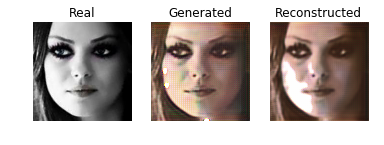

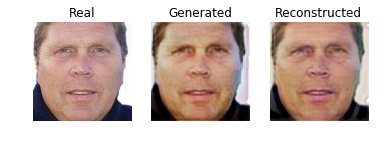

In [0]:
# example of using saved cyclegan models for image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

# load and prepare training images
def load_real_samples(filename):
	# load the dataset
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	return X

# plot the image, the translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()

# load dataset
# load image data
dataset = load_real_samples(gpath+'clean_face.npz')
A_data, B_data = dataset
print('Loaded', A_data.shape, B_data.shape)
import os
from shutil import copyfile
# example of using saved cyclegan models for image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

files = os.listdir(gpath)
last_iter = max([int(x.split("_")[3].split(".")[0]) for x in files[2:]])
print("last_iter : ",last_iter)
d_model_A,d_model_B,g_model_AtoB,g_model_BtoA,c_model_AtoB,c_model_BtoA = load_models(last_iter)
# plot A->B->A
A_real = select_sample(A_data, 1)
B_generated  = g_model_AtoB.predict(A_real)
A_reconstructed = g_model_BtoA.predict(B_generated)
show_plot(A_real, B_generated, A_reconstructed)
# plot B->A->B
B_real = select_sample(B_data, 1)
A_generated  = g_model_BtoA.predict(B_real)
B_reconstructed = g_model_AtoB.predict(A_generated)
show_plot(B_real, A_generated, B_reconstructed)

# 12th Epoch

In [0]:
# define properties of the training run
n_epochs, n_batch = 12, 3
train(n_epochs, n_batch, d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset,last_iter)

 23200, dA[0.000,0.001] dB[0.000,0.000] g[1.596,1.772]
 23300, dA[0.000,0.000] dB[0.000,0.000] g[2.182,2.129]
 23400, dA[0.000,0.000] dB[0.004,0.002] g[2.053,1.574]
 23500, dA[0.000,0.000] dB[0.000,0.000] g[1.699,1.852]
 23600, dA[0.000,0.000] dB[0.000,0.000] g[1.479,1.467]
 23700, dA[0.000,0.000] dB[0.000,0.000] g[1.643,1.678]
 23800, dA[0.000,0.000] dB[0.000,0.000] g[1.823,1.748]
> Models Saved:
 23900, dA[0.000,0.000] dB[0.000,0.000] g[1.902,1.909]
 24000, dA[0.000,0.000] dB[0.000,0.000] g[1.374,1.517]
 24100, dA[0.000,0.000] dB[0.000,0.000] g[1.309,1.320]
 24200, dA[0.000,0.000] dB[0.000,0.000] g[1.155,1.360]
 24300, dA[0.000,0.000] dB[0.005,0.002] g[0.995,1.029]
 24400, dA[0.000,0.000] dB[0.000,0.000] g[1.370,1.592]
 24500, dA[0.000,0.000] dB[0.000,0.000] g[1.252,1.144]
 24600, dA[0.000,0.000] dB[0.000,0.000] g[1.351,1.382]
> Models Saved:
 24700, dA[0.000,0.000] dB[0.000,0.000] g[1.302,1.141]


## Plotting results after 12th epochs

Loaded (2310, 200, 200, 3) (2299, 200, 200, 3)
last_iter :  24640
# plot A->B->A


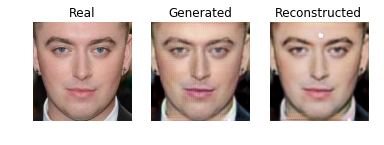

# plot B->A->B


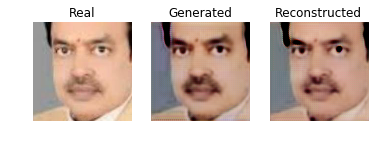

In [23]:
# example of using saved cyclegan models for image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

# load and prepare training images
def load_real_samples(filename):
	# load the dataset
	data = load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]

# select a random sample of images from the dataset
def select_sample(dataset, n_samples):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	return X

# plot the image, the translation, and the reconstruction
def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()

# load dataset
# load image data
#dataset = load_real_samples(gpath+'clean_face.npz')
A_data, B_data = dataset
print('Loaded', A_data.shape, B_data.shape)
import os
from shutil import copyfile
# example of using saved cyclegan models for image translation
from keras.models import load_model
from numpy import load
from numpy import vstack
from matplotlib import pyplot
from numpy.random import randint
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

files = os.listdir(gpath)
last_iter = max([int(x.split("_")[3].split(".")[0]) for x in files[2:]])
print("last_iter : ",last_iter)
#d_model_A,d_model_B,g_model_AtoB,g_model_BtoA,c_model_AtoB,c_model_BtoA = load_models(last_iter)
print('# plot A->B->A')
A_real = select_sample(A_data, 1)
B_generated  = g_model_AtoB.predict(A_real)
A_reconstructed = g_model_BtoA.predict(B_generated)
show_plot(A_real, B_generated, A_reconstructed)
print('# plot B->A->B')
B_real = select_sample(B_data, 1)
A_generated  = g_model_BtoA.predict(B_real)
B_reconstructed = g_model_AtoB.predict(A_generated)
show_plot(B_real, A_generated, B_reconstructed)

# Model performance after 12 Epochs

In [0]:
def select_sample(dataset, n_samples,i):
	# choose random instances
	ix = randint(i, i+1, n_samples)
	# retrieve selected images
	X = dataset[ix]
	return X

def show_plot(imagesX, imagesY1, imagesY2):
	images = vstack((imagesX, imagesY1, imagesY2))
	titles = ['Real', 'Generated', 'Reconstructed']
	# scale from [-1,1] to [0,1]
	images = (images + 1) / 2.0
	# plot images row by row
	for i in range(len(images)):
		# define subplot
		pyplot.subplot(1, len(images), 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(images[i])
		# title
		pyplot.title(titles[i])
	pyplot.show()

## Young to Old : 20 to 50 and Cycle Consistency

# plot A->B


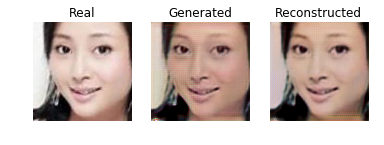

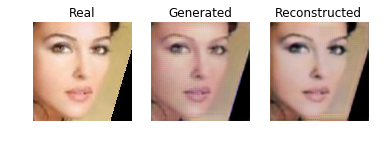

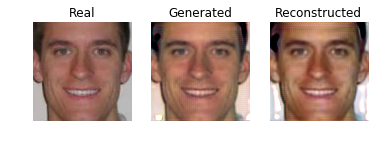

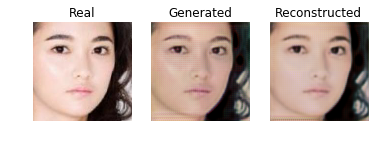

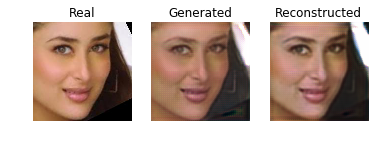

In [51]:
print("# plot A->B")
for i in [11,47,150,155,183]:
  A_real = select_sample(A_data, 1, i)
  B_generated  = g_model_AtoB.predict(A_real)
  A_reconstructed = g_model_BtoA.predict(B_generated)
  show_plot(A_real, B_generated, A_reconstructed)

## Old to Young : 50 to 20 and Cycle Consistency

# plot B->A


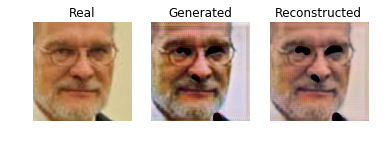

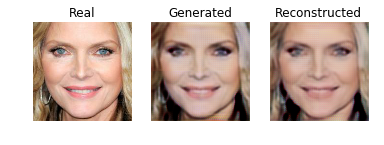

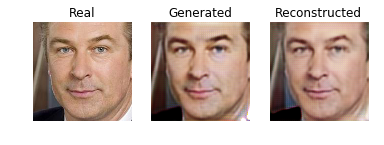

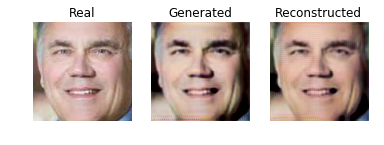

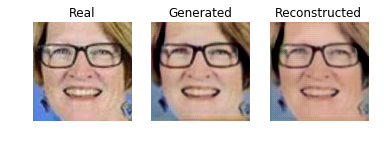

In [60]:
print("# plot B->A")
for i in [8,19,23,35,64]:
  B_real = select_sample(B_data, 1, i)
  A_generated  = g_model_BtoA.predict(B_real)
  B_reconstructed = g_model_AtoB.predict(A_generated)
  show_plot(B_real, A_generated, B_reconstructed)

# Results

The results looks fine considering the fact that model was trained for only 12 epochs. Training of CycleGAN is hardware intensive. Even on a 12GB Nvidia T4 GPU, each epoch takes nearly 5 hours. With further more epochs, we can improve the results further. 